### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Prepearing X and Y variables

In [6]:
X=df.drop(columns=["math_score"],axis=1)

In [7]:
y=df['math_score']

In [8]:
# Create Column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', oh_transformer, cat_features)
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
#seperate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (800, 19)
X_test shape: (200, 19)


### Create an Evaluation Function to give all metrics after model training

In [ ]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2


In [12]:
models={
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=0)
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_test, y_pred)
    model_list.append(list(models.keys())[i])
    r2_list.append(model_train_r2)
    print(f"{list(models.keys())[i]}: ")
    print(f"MAE: {model_train_mae}")
    print(f"MSE: {model_train_mse}")
    print(f"RMSE: {model_train_rmse}")
    print(f"R2 Score: {model_train_r2}")
    print("---------------------------------------------------")


Random Forest: 
MAE: 4.604491666666666
MSE: 36.054553236111104
RMSE: 6.004544382058567
R2 Score: 0.8518336882460347
---------------------------------------------------
Decision Tree: 
MAE: 6.355
MSE: 64.685
RMSE: 8.042698552103019
R2 Score: 0.7341767678262041
---------------------------------------------------
KNN: 
MAE: 5.631
MSE: 52.661
RMSE: 7.256789923926419
R2 Score: 0.7835894375897926
---------------------------------------------------
SVR: 
MAE: 5.4015392444969965
MSE: 66.04200493745648
RMSE: 8.126623218622633
R2 Score: 0.7286001513223705
---------------------------------------------------
Linear Regression: 
MAE: 4.214763142474851
MSE: 29.095169866715487
RMSE: 5.393993869732843
R2 Score: 0.8804332983749565
---------------------------------------------------
Ridge Regression: 
MAE: 4.211100688014258
MSE: 29.056272192348242
RMSE: 5.390387016935634
R2 Score: 0.880593148502874
---------------------------------------------------
Lasso Regression: 
MAE: 5.157879138921817
MSE: 42.5063

### Results

In [14]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model,R2 Score
5,Ridge Regression,0.880593
4,Linear Regression,0.880433
7,AdaBoost Regressor,0.856412
0,Random Forest,0.851834
9,CatBoost Regressor,0.851632
6,Lasso Regression,0.825320
8,XGBoost Regressor,0.821221
2,KNN,0.783589
1,Decision Tree,0.734177
3,SVR,0.728600


## Linear Regression

In [15]:
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)
print("R2 Score for Linear Regression:",score)

R2 Score for Linear Regression: 0.8804332983749565


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted Math Scores')

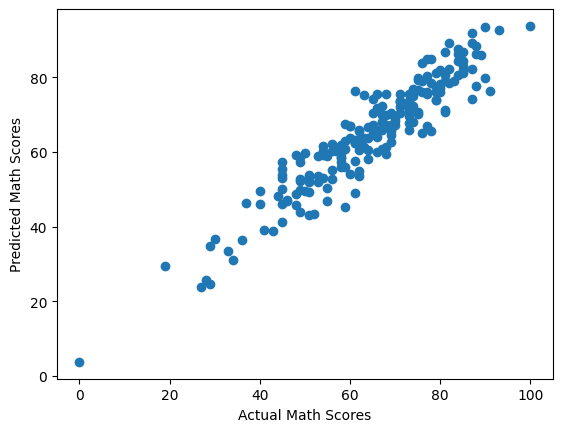

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")

<Axes: xlabel='math_score'>

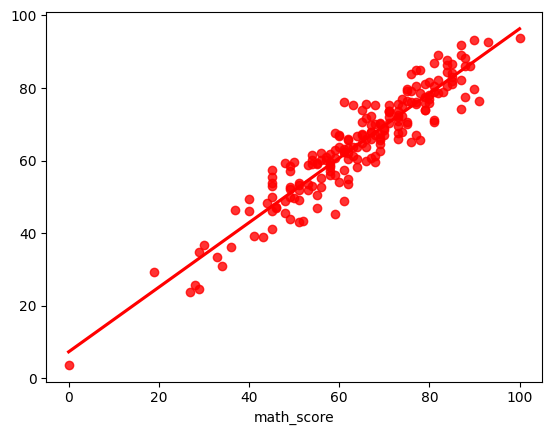

In [17]:
sns.regplot(x=y_test, y=y_pred, ci=None, color ='r')

### Difference between Actual and Predicted Values

In [19]:
pred_df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df['Difference'] = pred_df['Actual'] - pred_df['Predicted']
pred_df.head()

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
